In [1]:
# coding: utf8

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

In [2]:
def ode(t, y):
    y1, y2, y3, y4 = y
    mu = 1/82.45
    y1_dot = y3
    y2_dot = y4
    y3_dot = y1 + 2*y4 - (1-mu) * (y1 + mu) / ((y1 + mu)**2 + y2**2)**(3/2) - mu * (y1 - (1-mu)) / ((y1 - (1-mu))**2 +y2**2)**(3/2)
    y4_dot = y2 - 2*y3 - (1-mu) * y2 / ((y1 + mu)**2 + y2**2)**(3/2) - mu * y2 / ((y1 - (1-mu))**2 +y2**2)**(3/2)
    return [y1_dot, y2_dot, y3_dot, y4_dot]

In [3]:
def euler_explicit(f, t_span, t_eval, y0):
    # stepsize
    tmin = t_span[0]
    tmax = t_span[1]
    n_steps = np.shape(t_eval)[0]
    h = abs(tmax-tmin) / n_steps 
    
    # convert to array
    f_ = lambda t, y: np.asarray(f(t, y)) 
    
    # n_steps + 1 rows and number of initial values columns; +1 since we have y[n+1] in euler loop
    y = np.zeros((n_steps + 1, len(y0))) 
    
    # first row contains initial values
    y[0] = y0 
    
    # euler formula
    for n in range(n_steps):
        y[n+1] = y[n] + h * f_(t_eval[n], y[n])
        
    return y


def heun3(f, t_span, t_eval, y0):
    # stepsize
    tmin = t_span[0]
    tmax = t_span[1]
    n_steps = np.shape(t_eval)[0]
    h = abs(tmax-tmin) / n_steps 
    
    # convert to array
    f_ = lambda t, y: np.asarray(f(t, y)) 
    
    # n_steps + 1 rows and number of initial values columns; +1 since we have y[n+1] in euler loop
    y = np.zeros((n_steps + 1, len(y0))) 
    
    # first row contains initial values
    y[0] = y0 
    
    # heun third order formula
    for n in range(n_steps):
        k1 = f_(t_eval[n], y[n])
        k2 = f_(t_eval[n] + 1/3 * h, y[n] + 1/3 * h * k1)
        k3 = f_(t_eval[n] + 2/3 * h, y[n] + 2/3 * h * k2)
        y[n+1] = y[n] + h / 4 * (k1 + 3*k3)

    return y

In [4]:
tmin = 0
tmax = 4*np.pi
t = np.linspace(tmin, tmax, 5000)

sol_1 = solve_ivp(
    lambda t, y: ode(t, y),
    method="RK45",
    rtol=1e-3,
    t_span = [tmin, tmax],
    t_eval = t,
    y0 = [1.2, 0, 0, -1.05])

sol_2 = solve_ivp(
    lambda t, y: ode(t, y),
    method="RK45",
    rtol=1e-6,
    t_span = [tmin, tmax],
    t_eval = t,
    y0 = [1.2, 0, 0, -1.05])

sol_3 = euler_explicit(
    ode,
    t_span = [tmin, tmax],
    t_eval = np.linspace(tmin, tmax, 10000),
    y0 = [1.2, 0.0, 0.0, -1.05])

sol_4 = euler_explicit(
    ode,
    t_span = [tmin, tmax],
    t_eval = np.linspace(tmin, tmax, 50000),
    y0 = [1.2, 0.0, 0.0, -1.05])

sol_5 = heun3(
    ode,
    t_span = [tmin, tmax],
    t_eval = np.linspace(tmin, tmax, 5000),
    y0 = [1.2, 0.0, 0.0, -1.05])

sol_6 = heun3(
    ode,
    t_span = [tmin, tmax],
    t_eval = np.linspace(tmin, tmax, 20000),
    y0 = [1.2, 0.0, 0.0, -1.05])

sol_7 = solve_ivp(
    lambda t, y: ode(t, y),
    method="RK45",
    rtol=1e-6,
    t_span = [tmin, tmax],
    t_eval = t,
    y0 = [1.3, 0, 0, -1.05])

sol_8 = solve_ivp(
    lambda t, y: ode(t, y),
    method="RK45",
    rtol=1e-6,
    t_span = [tmin, tmax],
    t_eval = t,
    y0 = [1.5, 0, 0, -1.05])

sol_9 = solve_ivp(
    lambda t, y: ode(t, y),
    method="RK45",
    rtol=1e-6,
    t_span = [tmin, tmax],
    t_eval = t,
    y0 = [0.3, 0, 0, -1.05])


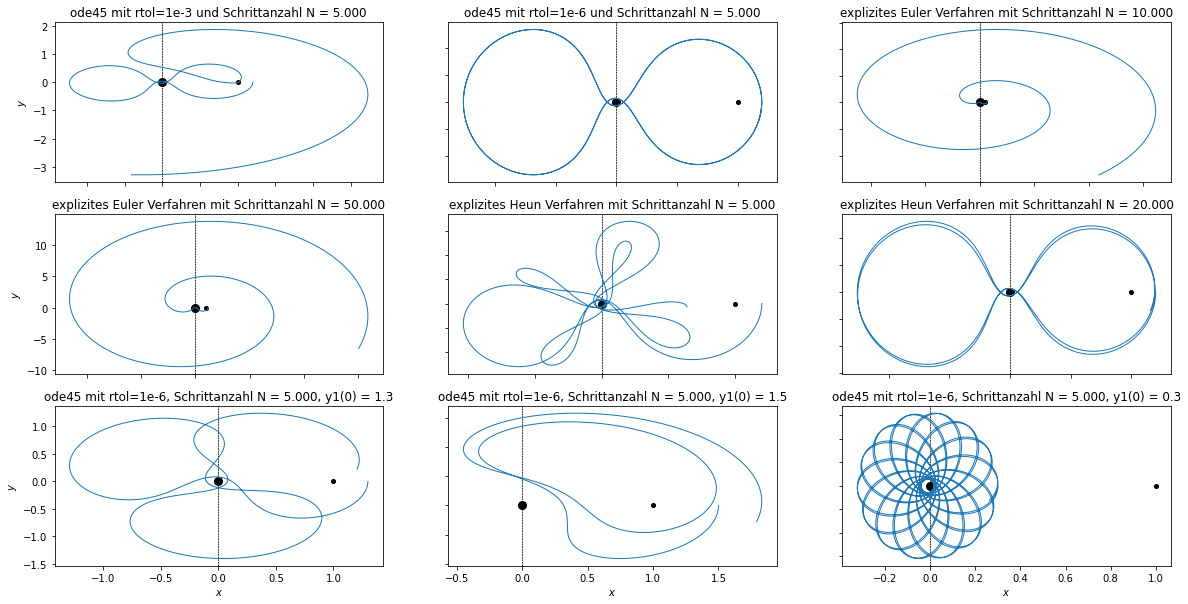

In [5]:
x_1 = sol_1.y[0]
y_1 = sol_1.y[1]
x_2 = sol_2.y[0]
y_2 = sol_2.y[1]
x_3 = sol_3[:,0]
y_3 = sol_3[:,1]
x_4 = sol_4[:,0]
y_4 = sol_4[:,1]
x_5 = sol_5[:,0]
y_5 = sol_5[:,1]
x_6 = sol_6[:,0]
y_6 = sol_6[:,1]
x_7 = sol_7.y[0]
y_7 = sol_7.y[1]
x_8 = sol_8.y[0]
y_8 = sol_8.y[1]
x_9 = sol_9.y[0]
y_9 = sol_9.y[1]

fig, axs = plt.subplots(3, 3, figsize=(20, 10))

for ax in axs.flat:
    ax.set(xlabel=r"$x$", ylabel=r"$y$")
    ax.axvline(x=0, color="k", ls="--", lw="0.5")
    ax.axvline(x=0, color="k", ls="--", lw="0.5")
    ax.label_outer()
    ax.plot(0, 0, "ko", ls="none", markersize=8)
    ax.plot(1, 0, "ko", ls="none", markersize=4)

axs[0, 0].plot(x_1, y_1, lw=1, alpha=1, ls="-", label="Trajectory")
axs[0, 0].set_title('ode45 mit rtol=1e-3 und Schrittanzahl N = 5.000')
axs[0, 1].plot(x_2, y_2, lw=1, alpha=1, ls="-", label="Trajectory")
axs[0, 1].set_title('ode45 mit rtol=1e-6 und Schrittanzahl N = 5.000')
axs[0, 2].plot(x_3, y_3, lw=1, alpha=1, ls="-", label="Trajectory")
axs[0, 2].set_title('explizites Euler Verfahren mit Schrittanzahl N = 10.000')

axs[1, 0].plot(x_4, y_4, lw=1, alpha=1, ls="-", label="Trajectory")
axs[1, 0].set_title('explizites Euler Verfahren mit Schrittanzahl N = 50.000')
axs[1, 1].plot(x_5, y_5, lw=1, alpha=1, ls="-", label="Trajectory")
axs[1, 1].set_title('explizites Heun Verfahren mit Schrittanzahl N = 5.000')
axs[1, 2].plot(x_6, y_6, lw=1, alpha=1, ls="-", label="Trajectory")
axs[1, 2].set_title('explizites Heun Verfahren mit Schrittanzahl N = 20.000')

axs[2, 0].plot(x_7, y_7, lw=1, alpha=1, ls="-", label="Trajectory")
axs[2, 0].set_title('ode45 mit rtol=1e-6, Schrittanzahl N = 5.000, y1(0) = 1.3')
axs[2, 1].plot(x_8, y_8, lw=1, alpha=1, ls="-", label="Trajectory")
axs[2, 1].set_title('ode45 mit rtol=1e-6, Schrittanzahl N = 5.000, y1(0) = 1.5')
axs[2, 2].plot(x_9, y_9, lw=1, alpha=1, ls="-", label="Trajectory")
axs[2, 2].set_title('ode45 mit rtol=1e-6, Schrittanzahl N = 5.000, y1(0) = 0.3')

plt.show()